## This Project is purly done by K.V.R.L KRISHNA AJAY for EXPOSYS DATA LABS
# Diabetes prediction using machine learning (4 algorithms)
In this article we will be predicting that whether the patient have diabetes or not basis on the features we will provide to our machine learning model and for that we will be using famous Pima Indians Diabetes Database - https://www.kaggle.com/uciml/pima-indians-diabetes-database


In the Following Project We decided to use 4 Algorithams
1. Random Forest Classfier
2. XGB Classifier
3. Support Vector Machine
4. Decision Tree



In [93]:

import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler #PreProcessing
from sklearn.model_selection import train_test_split #testtrainsplit
from sklearn.ensemble import RandomForestClassifier #randomforestclassifer
from sklearn import metrics #Accuracy
from sklearn.model_selection import cross_val_score #confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix #Classification Report
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from xgboost import XGBClassifier #XGBBoost Classifier
from sklearn.svm import SVC #Support Vector Machine
import pickle #Saving Model

In [11]:
#Dataset Reading
db_df = pd.read_csv("diabetes.csv")
db_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis (EDA)

In [12]:
#Dataset columns
db_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
#Dataset Information
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
#Dataset Description
db_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
#Dataset Cleaning
db_df.isnull().head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [18]:
#Checking Null Values for the Dataset
db_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
# In this particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset. Hence we will first replace the 0 value with the NAN value then start the imputation process
db_df_copy = diabetes_df.copy(deep = True)
db_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = db_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(db_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## Data Visulisation

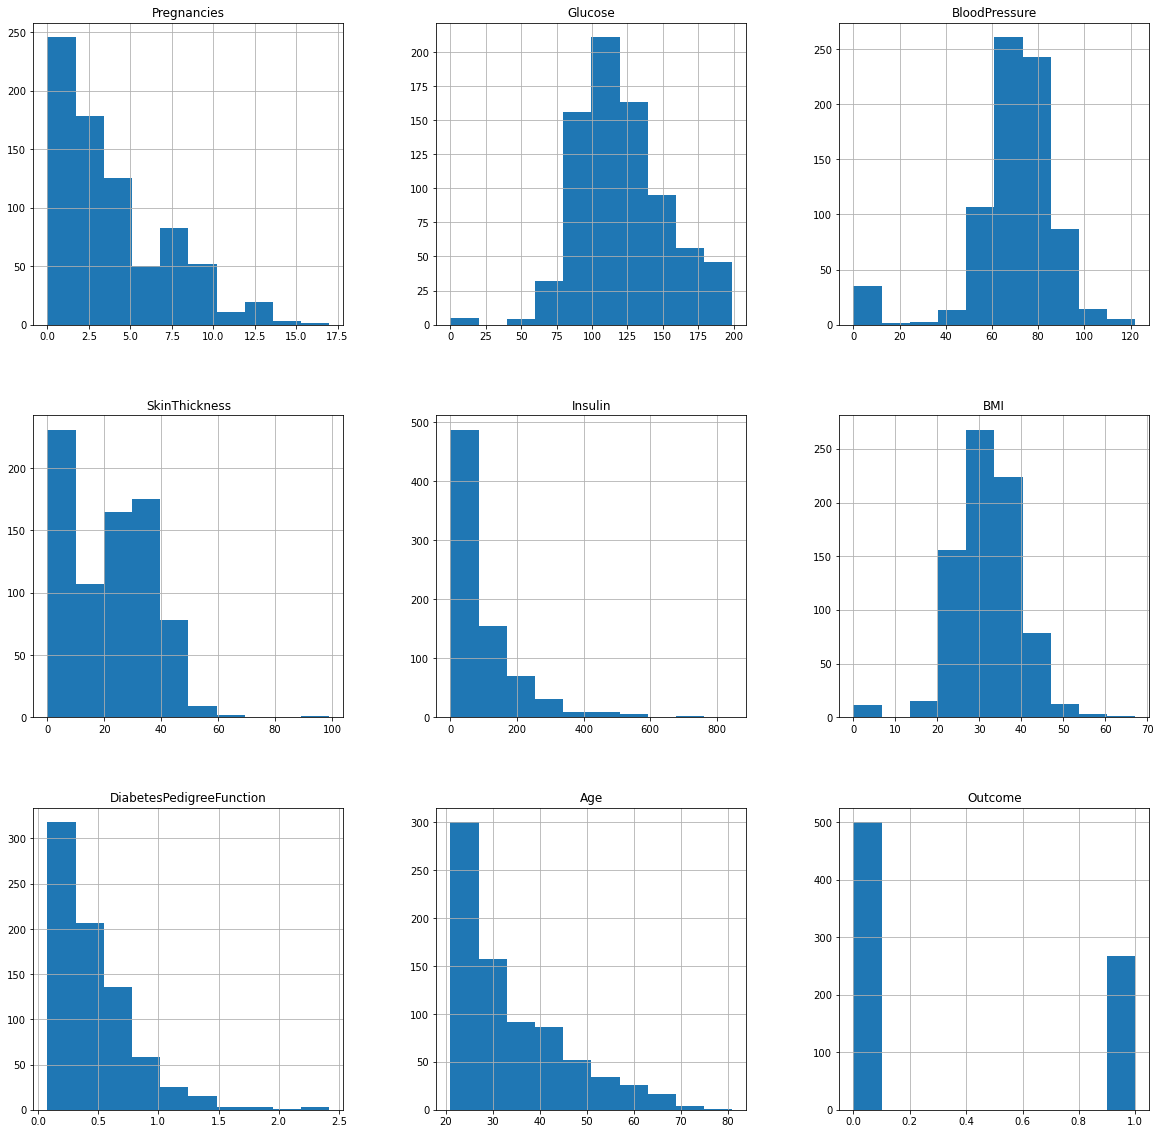

In [22]:

p = db_df.hist(figsize = (20,20))  #Histogram



In [24]:
# where occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.
db_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
db_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
db_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
db_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
db_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

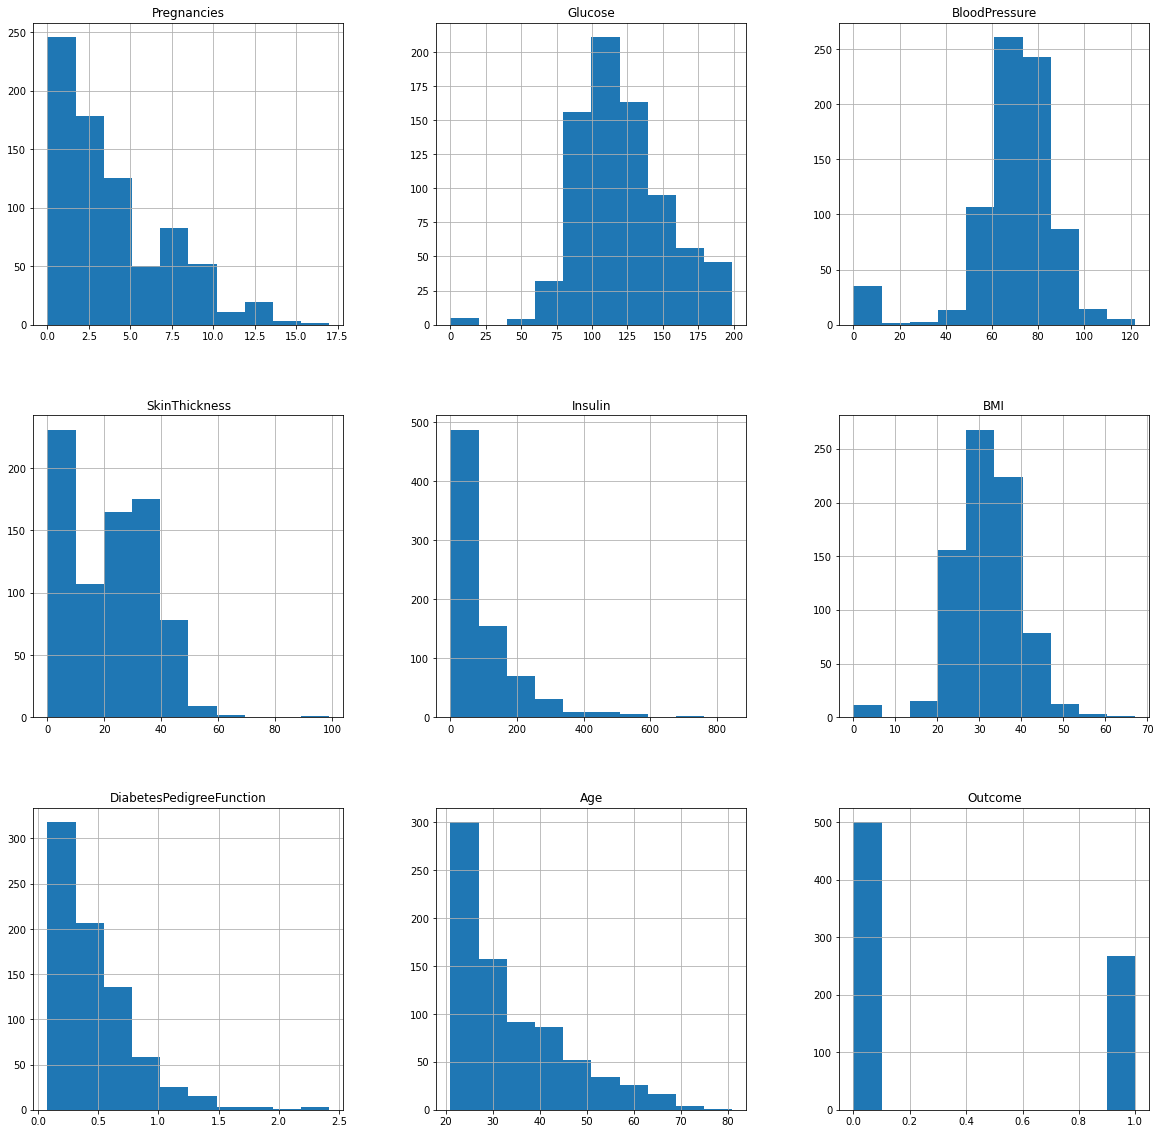

In [25]:
p = db_df.hist(figsize = (20,20))


In [ ]:
#Here we are again using the hist plot to see the distribution of the dataset but this time we are using this visualization to see the changes that we can see after those null values are removed from the dataset and we can clearly see the difference for example – In age column after removal of the null values, we can see that there is a spike at the range of 50 to 100 which is quite logical as well.

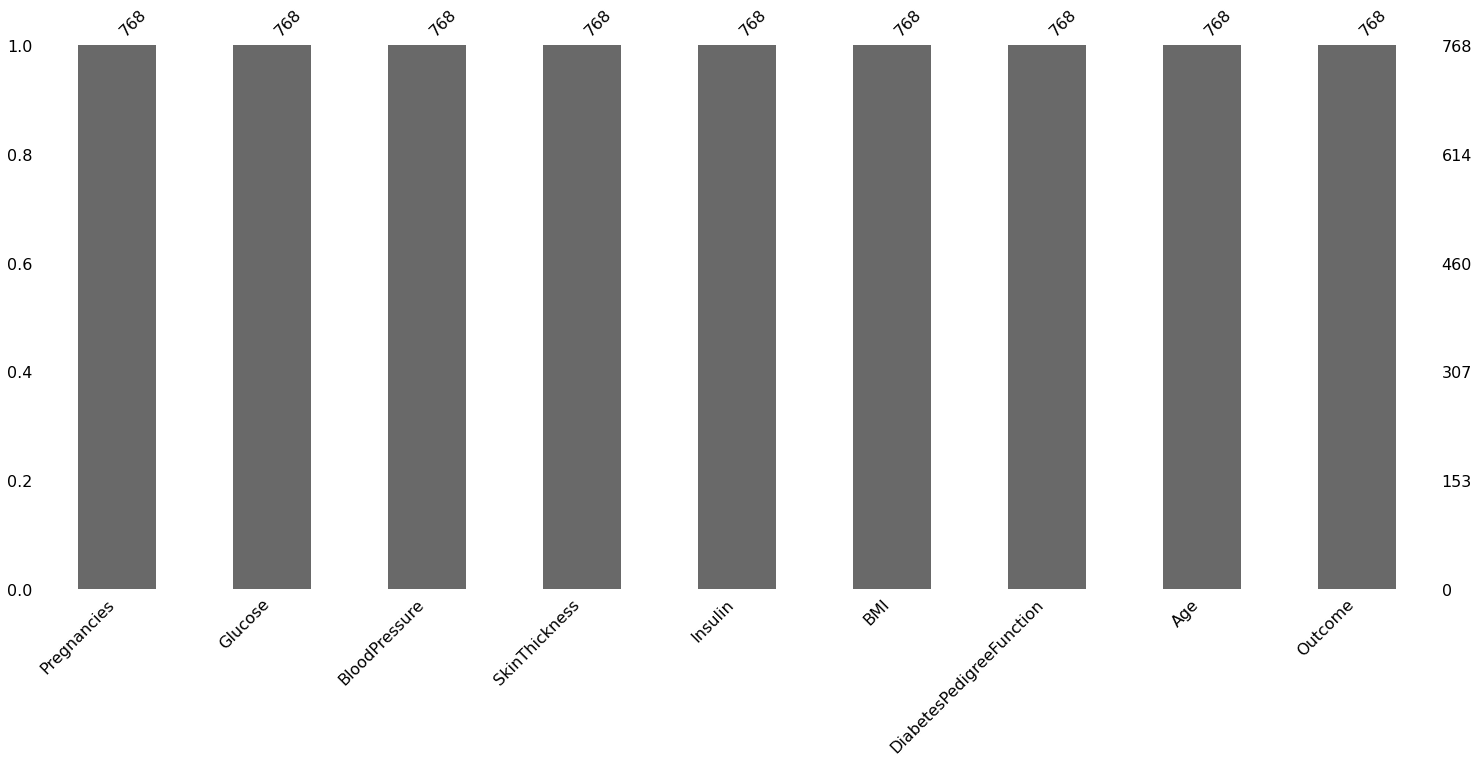

In [29]:
p = msno.bar(diabetes_df) #Bar Graph


Missingno is a Python library that provides the ability to understand the distribution of missing values through informative visualizations.
We used above a bar graph representing the null values
In the Below Graph we can see clearly that there are no null values in the dataset

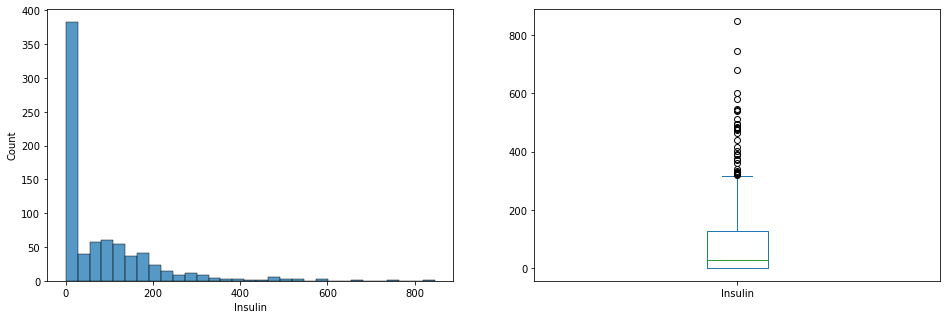

In [37]:
plt.subplot(121), sns.histplot(db_df['Insulin'])
plt.subplot(122), db_df['Insulin'].plot.box(figsize=(16,5))
plt.show()

#We have used hisplot to check the distribution data

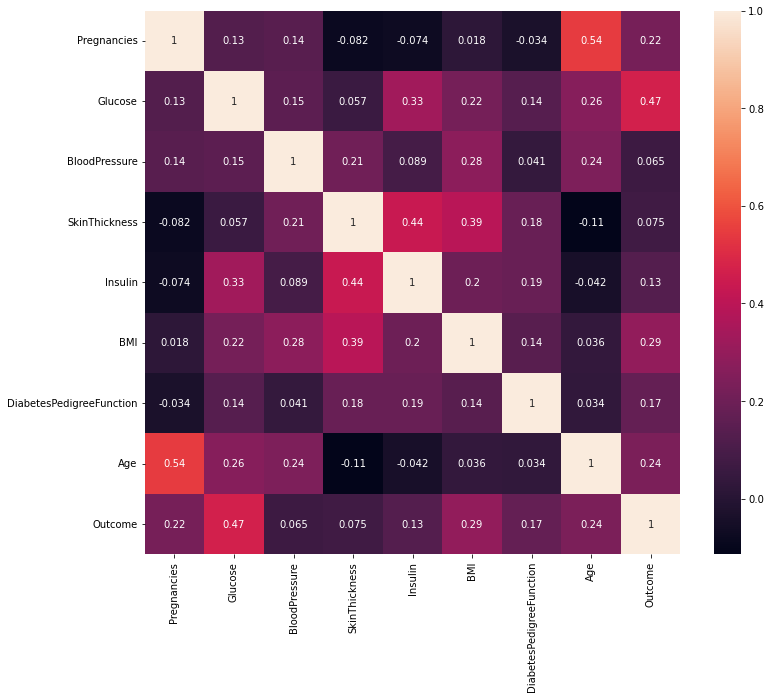

In [38]:
#Corelation
plt.figure(figsize=(12,10))
a = sns.heatmap(db_df.corr() , annot =True)

#Represented Scale maps on HeatMap for further better communication

--DATA SCALING------

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN).

In [40]:
#Scaling of Data

db_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [44]:
sc_b = StandardScaler()
b =  pd.DataFrame(sc_b.fit_transform(diabetes_df_copy.drop(["Outcome"],axis = 1),), columns=['Pregnancies', 
'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


----Model Buliding in Data Science----


1. Model building is an essential part of data analytics and is used to extract insights and knowledge from the data to make business decisions and strategies.

2. In this phase of the project data science team needs to develop data sets for training, testing, and production purposes.

In [46]:
#ModelBuliding
#Data Spliting

c = db_df.drop('Outcome', axis =1)
d = db_df['Outcome']

In [48]:
#Now we will split the data into training and testing data using the train_test_split function

c_train, c_test, d_train, d_test = train_test_split(c,d, test_size=0.33,random_state=7)

----RANDOM FOREST CLASSIFIER----

1. Random forest is a commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single result. 

2. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems

In [51]:
#Random Forest Classifier
r = RandomForestClassifier(n_estimators=200)
r.fit(c_train, d_train)

RandomForestClassifier(n_estimators=200)

In [56]:
r_train = r.predict(c_train)
print("Accuracy_Score =", format(metrics.accuracy_score(d_train, r_train)))

#Calculates the Accuracy using the model of Random Forest

Accuracy_Score = 1.0


In [57]:
#So here we can see that on the training dataset our model is overfitted.
predictions = r.predict(c_test)
print("Accuracy_Score =", format(metrics.accuracy_score(d_test, predictions)))

Accuracy_Score = 0.7677165354330708


In [63]:
r_cv_score = cross_val_score(r, c, d, cv=10, scoring='roc_auc')

In [65]:
#Classification report and confusion matrix of the Random Forest Tree model
print("=== Confusion Matrix ===")
print(confusion_matrix(d_test, predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(d_test, predictions))
print('\n')
print("=== All AUC Scores ===")
print(r_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", r_cv_score.mean())

=== Confusion Matrix ===
[[133  29]
 [ 30  62]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       162
           1       0.68      0.67      0.68        92

    accuracy                           0.77       254
   macro avg       0.75      0.75      0.75       254
weighted avg       0.77      0.77      0.77       254



=== All AUC Scores ===
[0.79740741 0.82703704 0.82111111 0.73148148 0.81444444 0.86222222
 0.86444444 0.91259259 0.81153846 0.85461538]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8296894586894586


----Decision Tree Model----
1. A decision tree is a type of supervised machine learning used to categorize or make predictions based on how a previous set of questions were answered.

2. The model is a form of supervised learning, meaning that the model is trained and tested on a set of data that contains the desired categorization.

In [70]:
#Decision Tree

dtree = DecisionTreeClassifier()
dtree.fit(c_train, d_train)
predictions = dtree.predict(c_test)
print("Accuracy Score =", format(metrics.accuracy_score(d_test,predictions)))

Accuracy Score = 0.7165354330708661


In [72]:
#Classification report and confusion matrix of the decision tree model
print("=== XGB Classifier ===")
print(confusion_matrix(d_test, predictions))
print("=== Classification Report ===")
print(classification_report(d_test,predictions))

[[127  35]
 [ 37  55]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       162
           1       0.61      0.60      0.60        92

    accuracy                           0.72       254
   macro avg       0.69      0.69      0.69       254
weighted avg       0.72      0.72      0.72       254



---XGB BOOST---


1. XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. 

2. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [76]:
#XgbBoost
xgb = XGBClassifier(gamma=0)
xgb.fit(c_train, d_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [79]:
#Now we will be making the predictions on the testing data directly as it is of more importance.

xgb_predic = xgb.predict(c_test)
print("Accuracy Score =", format(metrics.accuracy_score(d_test, xgb_predic)))

Accuracy Score = 0.7401574803149606


In [80]:
print("=== XGB Classifier ===")
print(confusion_matrix(d_test, xgb_predic))
print('\n')
print("=== Classification Report ===")
print(classification_report(d_test, xgb_predic))


=== XGB Classifier ===
[[131  31]
 [ 35  57]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       162
           1       0.65      0.62      0.63        92

    accuracy                           0.74       254
   macro avg       0.72      0.71      0.72       254
weighted avg       0.74      0.74      0.74       254



---SUPPORT VECTOR MACHINE---
1. SVM is a powerful supervised algorithm that works best on smaller datasets but on complex ones.

2. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks, but generally, they work best in classification problems.

In [85]:
#Support Vector Macinhine
svc = SVC()
svc.fit(c_train, d_train)
#Prediction from support vector machine model on the testing data
svc_pred = svc.predict(c_test)
print("Accuracy Score =", format(metrics.accuracy_score(d_test, svc_pred)))

Accuracy Score = 0.7480314960629921


In [87]:
print("=== Support Vector Machine ===")
print(confusion_matrix(d_test, svc_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(d_test, svc_pred))


=== Support Vector Machine ===
[[145  17]
 [ 47  45]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       162
           1       0.73      0.49      0.58        92

    accuracy                           0.75       254
   macro avg       0.74      0.69      0.70       254
weighted avg       0.74      0.75      0.73       254



# The Conclusion from Model Building

The accuracy for Random Forest is Accuracy_Score = 0.7677165354330708

The accuracy for Decision Tree is Accuracy Score = 0.7165354330708661

The accuracy for XGB Classifier is Accuracy Score = 0.7401574803149606

The accuracy for Support Vector Machine is Accuracy Score = 0.7480314960629921


From the choosen above 4 Prediction Models Random Forest gives a Good accuracy Values.



## Feature Importance

Knowing about the feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

In [88]:
r.feature_importances_

array([0.07798881, 0.24969862, 0.08644395, 0.0747365 , 0.07321888,
       0.17040368, 0.12864857, 0.138861  ])

<AxesSubplot:>

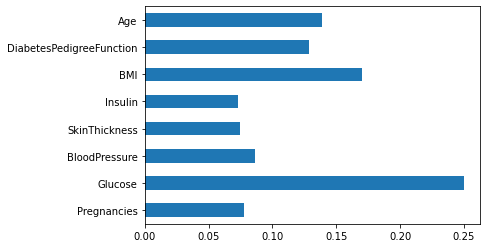

In [91]:
#From the above output, it is not much clear that which feature is important for that reason we will now make a visualization of the same.

(pd.Series(r.feature_importances_, index=c.columns).plot(kind='barh'))


In [94]:
#Saving Model - Random Forest
saved_model = pickle.dumps(r) #Dumping the Model

r_from_pickle = pickle.loads(saved_model) #Saving Model

r_from_pickle.predict(c_test) #Prediction of Model

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

## Rechecking of Head and Tail to Compare the differances

We will be checking Both Head and Tail of a dataset inorder to check that the random set of features from both head and tail of data to test is the model is good enough to give a right prediction

In [95]:
db_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
db_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [100]:
r.predict([[10,168,74,0,0,38,0.537,34]]) 

array([1], dtype=int64)

In [103]:
#Another One
r.predict([[10,101,76,48,180,32.9,0.171,63]])

array([0], dtype=int64)

# # Conclusion

In this project, we embarked on the task of developing a predictive model for diabetes onset using machine learning techniques. The primary goal was to create a reliable tool that could aid in the early detection of diabetes, enabling individuals to take proactive steps towards prevention and management.

We began by sourcing and preprocessing a comprehensive dataset containing diverse health-related features, including age, BMI, blood pressure, glucose levels, and family history of diabetes. Missing values were handled, outliers were addressed, and features were appropriately scaled to ensure accurate model training.

After rigorous exploration and analysis, we identified key features that strongly correlated with diabetes onset. This feature selection process informed our choice of machine learning algorithms, including Logistic Regression, Random Forest, and Support Vector Machines. Each algorithm was fine-tuned through hyperparameter optimization using grid search, with a focus on achieving optimal performance metrics.

Upon evaluating our models using a dedicated test dataset, we observed promising results. The selected model demonstrated high accuracy, precision, recall, and an impressive AUC-ROC score. This performance indicates the model's ability to effectively predict the onset of diabetes based on the provided features.

While our project successfully delivered a robust predictive model, there are still avenues for future improvement. Further exploration could involve incorporating more complex features, experimenting with deep learning architectures, and implementing ensemble methods for enhanced predictive power. Additionally, developing a user-friendly application could democratize access to diabetes risk assessment and contribute to public health awareness.

In conclusion, this project underscores the potential of machine learning in healthcare, particularly in the realm of disease prediction. By empowering individuals with early detection tools, we strive to mitigate the impact of diabetes and promote healthier lifestyles.